In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

data = pd.read_excel('/Users/mac/Desktop/академэссе/vvp_science.xlsx', index_col=0)
data

,vrp,science
region,,
Белгородская область,73475,31
Брянская область,33218,18
Владимирская область,46067,30
Воронежская область,45527,66
Ивановская область,25512,20
...,...,...
Амурская область,56930,15
Магаданская область,189490,10
Сахалинская область,212132,14


In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

scaled_data

,vrp,science
region,,
Белгородская область,0.332508,-0.200389
Брянская область,-0.547431,-0.329617
Владимирская область,-0.266577,-0.210329
Воронежская область,-0.278380,0.147534
Ивановская область,-0.715869,-0.309736
...,...,...
Амурская область,-0.029133,-0.359439
Магаданская область,2.868368,-0.409142
Сахалинская область,3.363277,-0.369380


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_19540/2322798934.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))


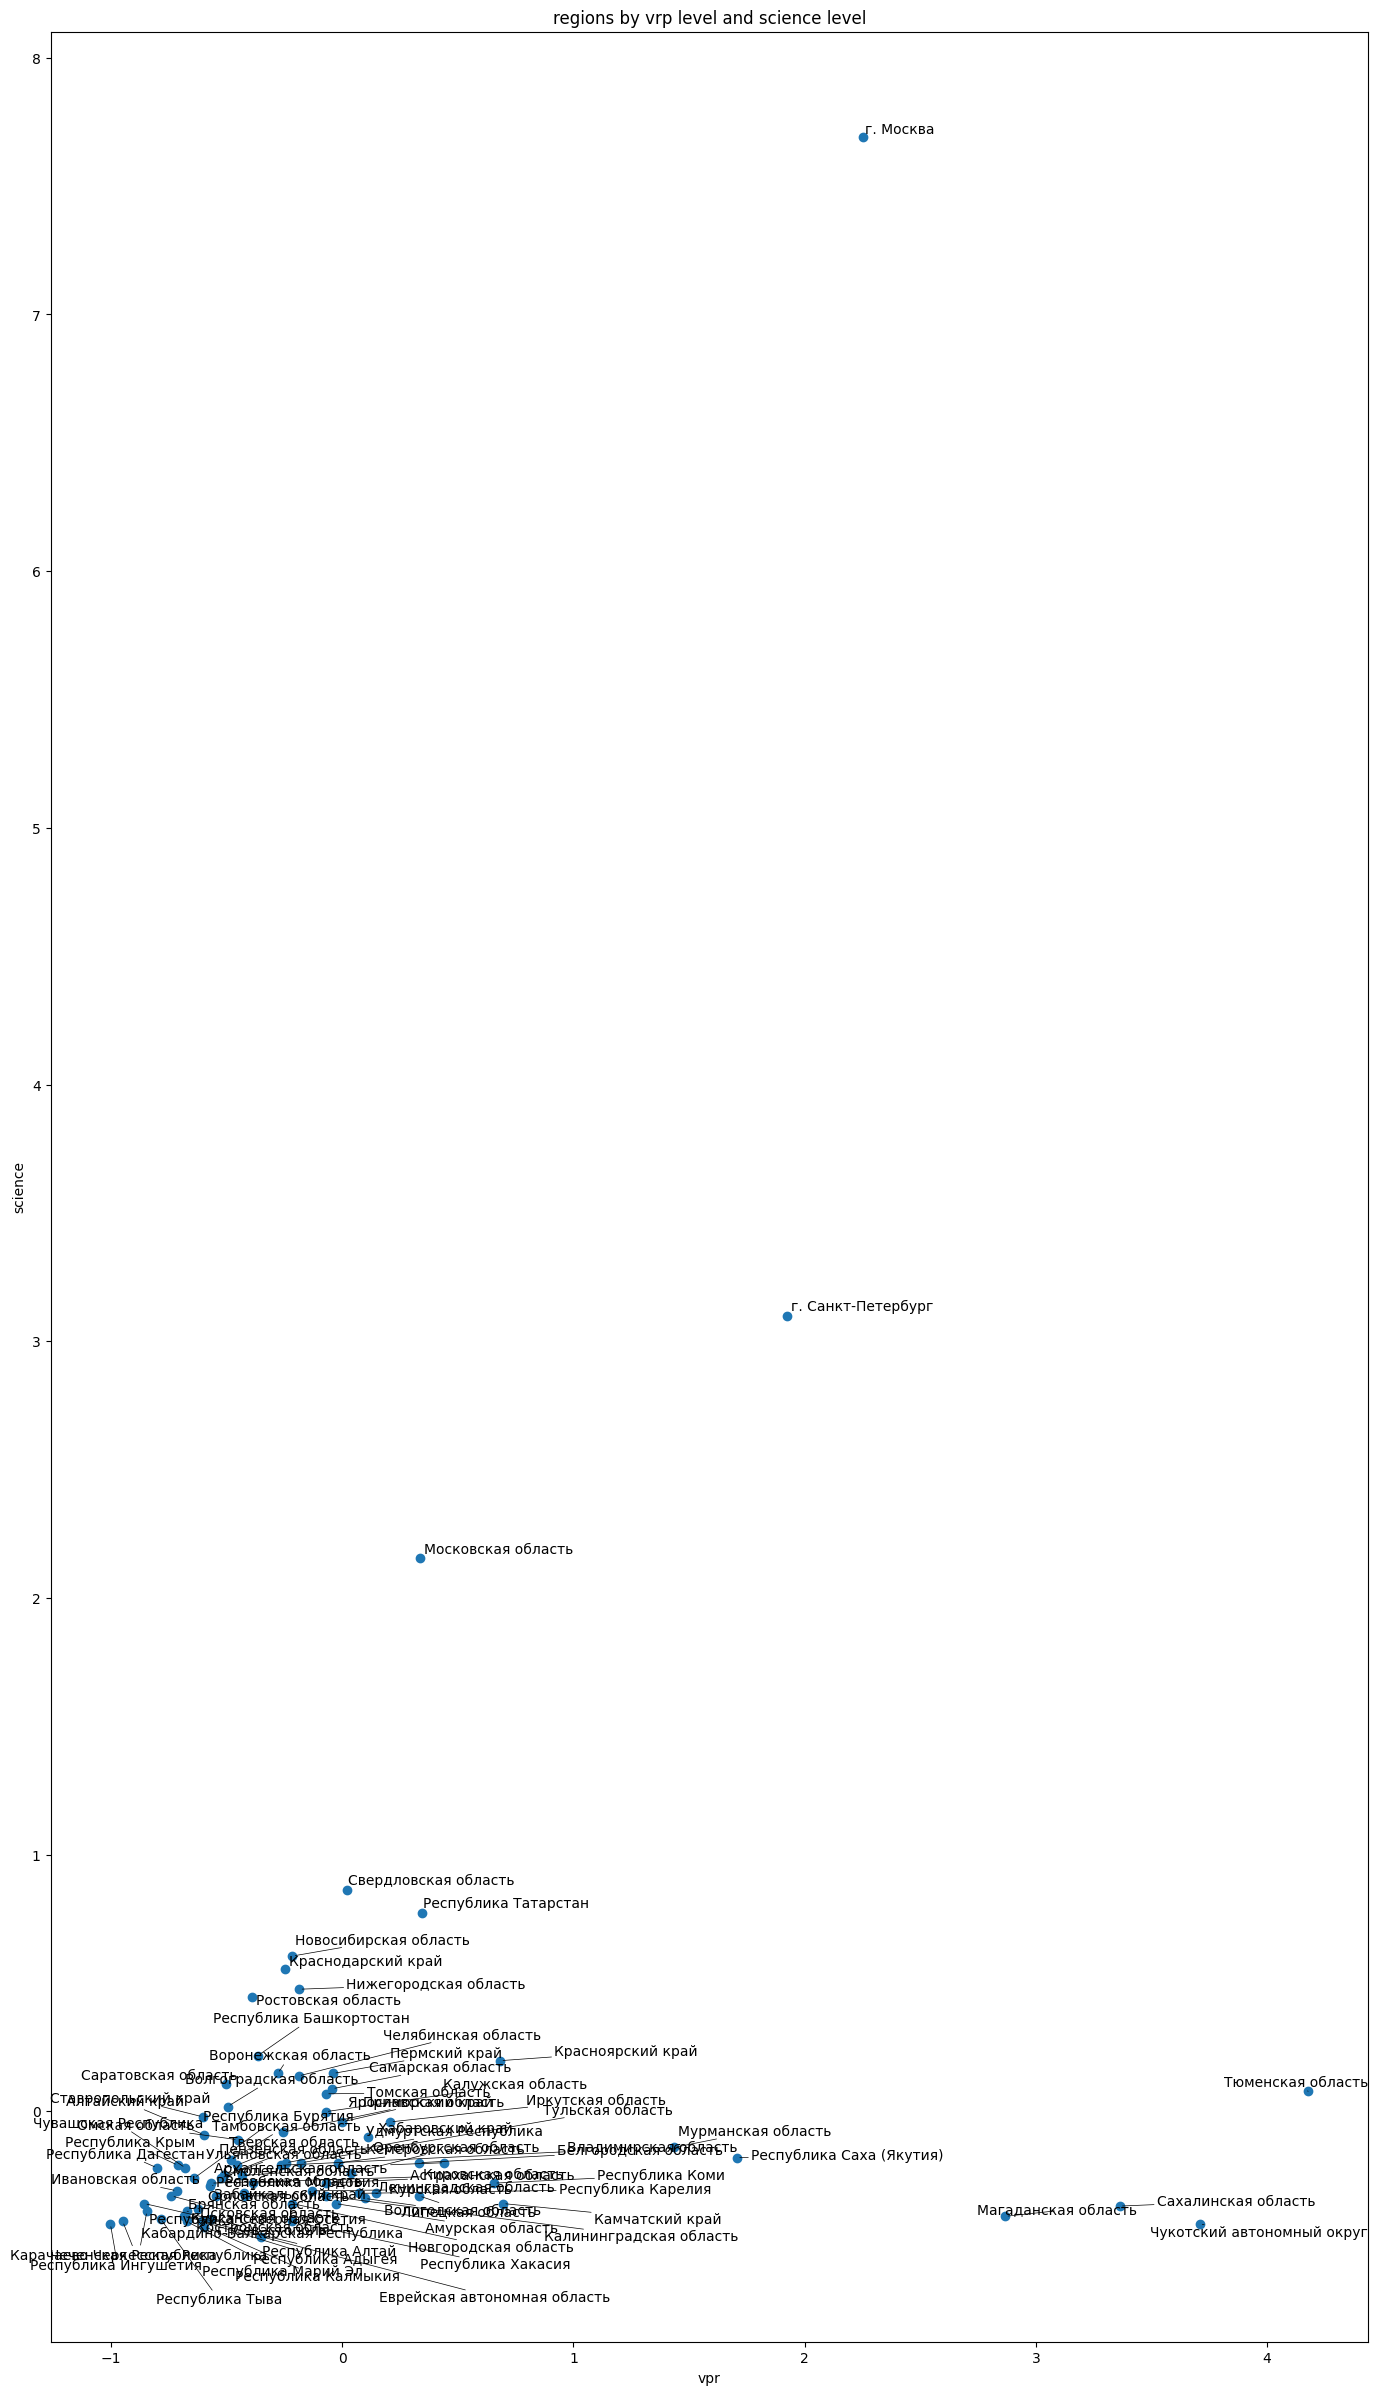

In [34]:
plt.figure(figsize=(17, 30))
plt.scatter(scaled_data['vrp'], scaled_data['science'])
texts = []
for i, txt in enumerate(scaled_data.index):
   texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5)) 
plt.xlabel('vpr')
plt.ylabel('science')
plt.title('regions by vrp level and science level')
plt.show()

In [35]:
data = data.drop('г. Москва')
data = data.drop('г. Санкт-Петербург')
data = data.drop('Московская область')
data

,vrp,science
region,,
Белгородская область,73475,31
Брянская область,33218,18
Владимирская область,46067,30
Воронежская область,45527,66
Ивановская область,25512,20
...,...,...
Амурская область,56930,15
Магаданская область,189490,10
Сахалинская область,212132,14


In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

scaled_data

,vrp,science
region,,
Белгородская область,0.405638,-0.127729
Брянская область,-0.510584,-0.580066
Владимирская область,-0.218149,-0.162524
Воронежская область,-0.230439,1.090101
Ивановская область,-0.685967,-0.510475
...,...,...
Амурская область,0.029085,-0.684451
Магаданская область,3.046061,-0.858427
Сахалинская область,3.561377,-0.719246


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_19540/3701239018.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))


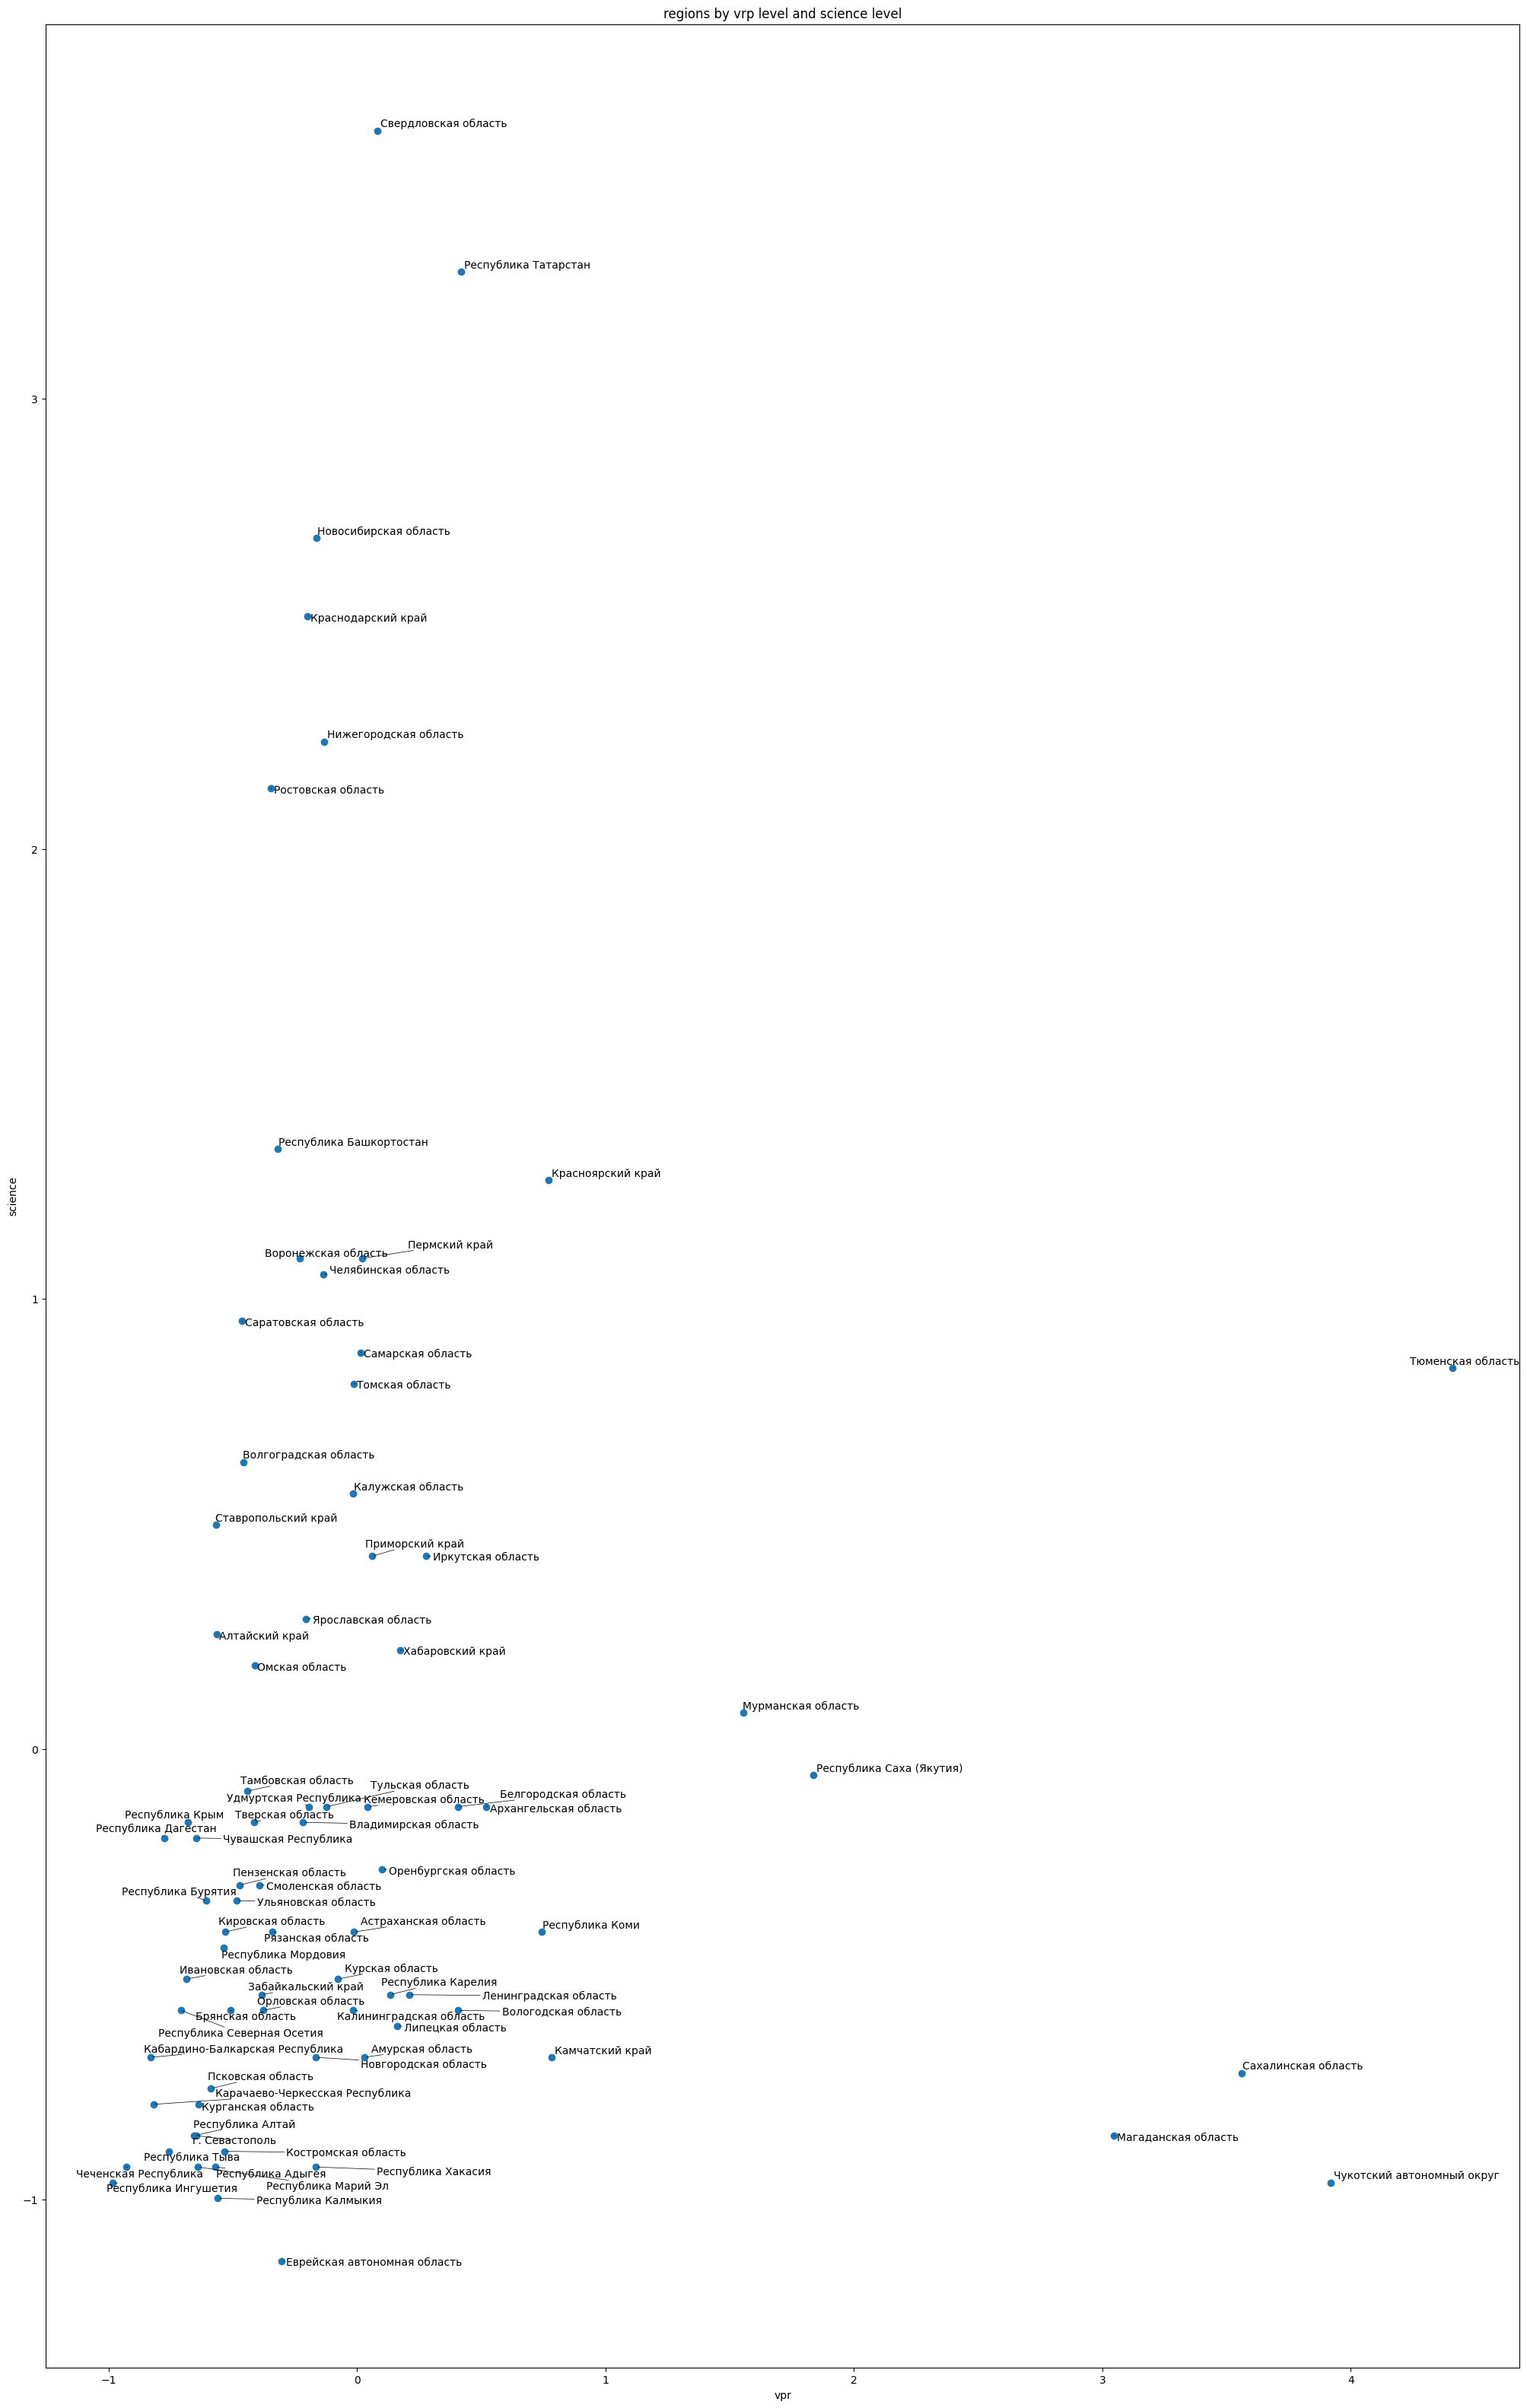

In [37]:
plt.figure(figsize=(25, 40))
plt.scatter(scaled_data['vrp'], scaled_data['science'])
texts = []
for i, txt in enumerate(scaled_data.index):
   texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5)) 
plt.xlabel('vpr')
plt.ylabel('science')
plt.title('regions by vrp level and science level')
plt.show()

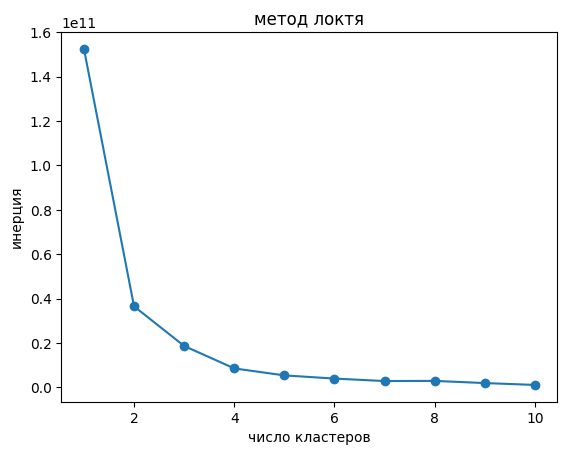

In [38]:
inert = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert, marker='o')
plt.title('метод локтя')
plt.xlabel('число кластеров')
plt.ylabel('инерция')
plt.show()

In [60]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

In [61]:
sil = silhouette_score(scaled_data, labels)
db = davies_bouldin_score(scaled_data, labels)
data['cluster'] = labels
data.head()

,vrp,science,cluster
region,,,
Белгородская область,73475,31,0
Брянская область,33218,18,0
Владимирская область,46067,30,0
Воронежская область,45527,66,0
Ивановская область,25512,20,0


/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_19540/1065938879.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))


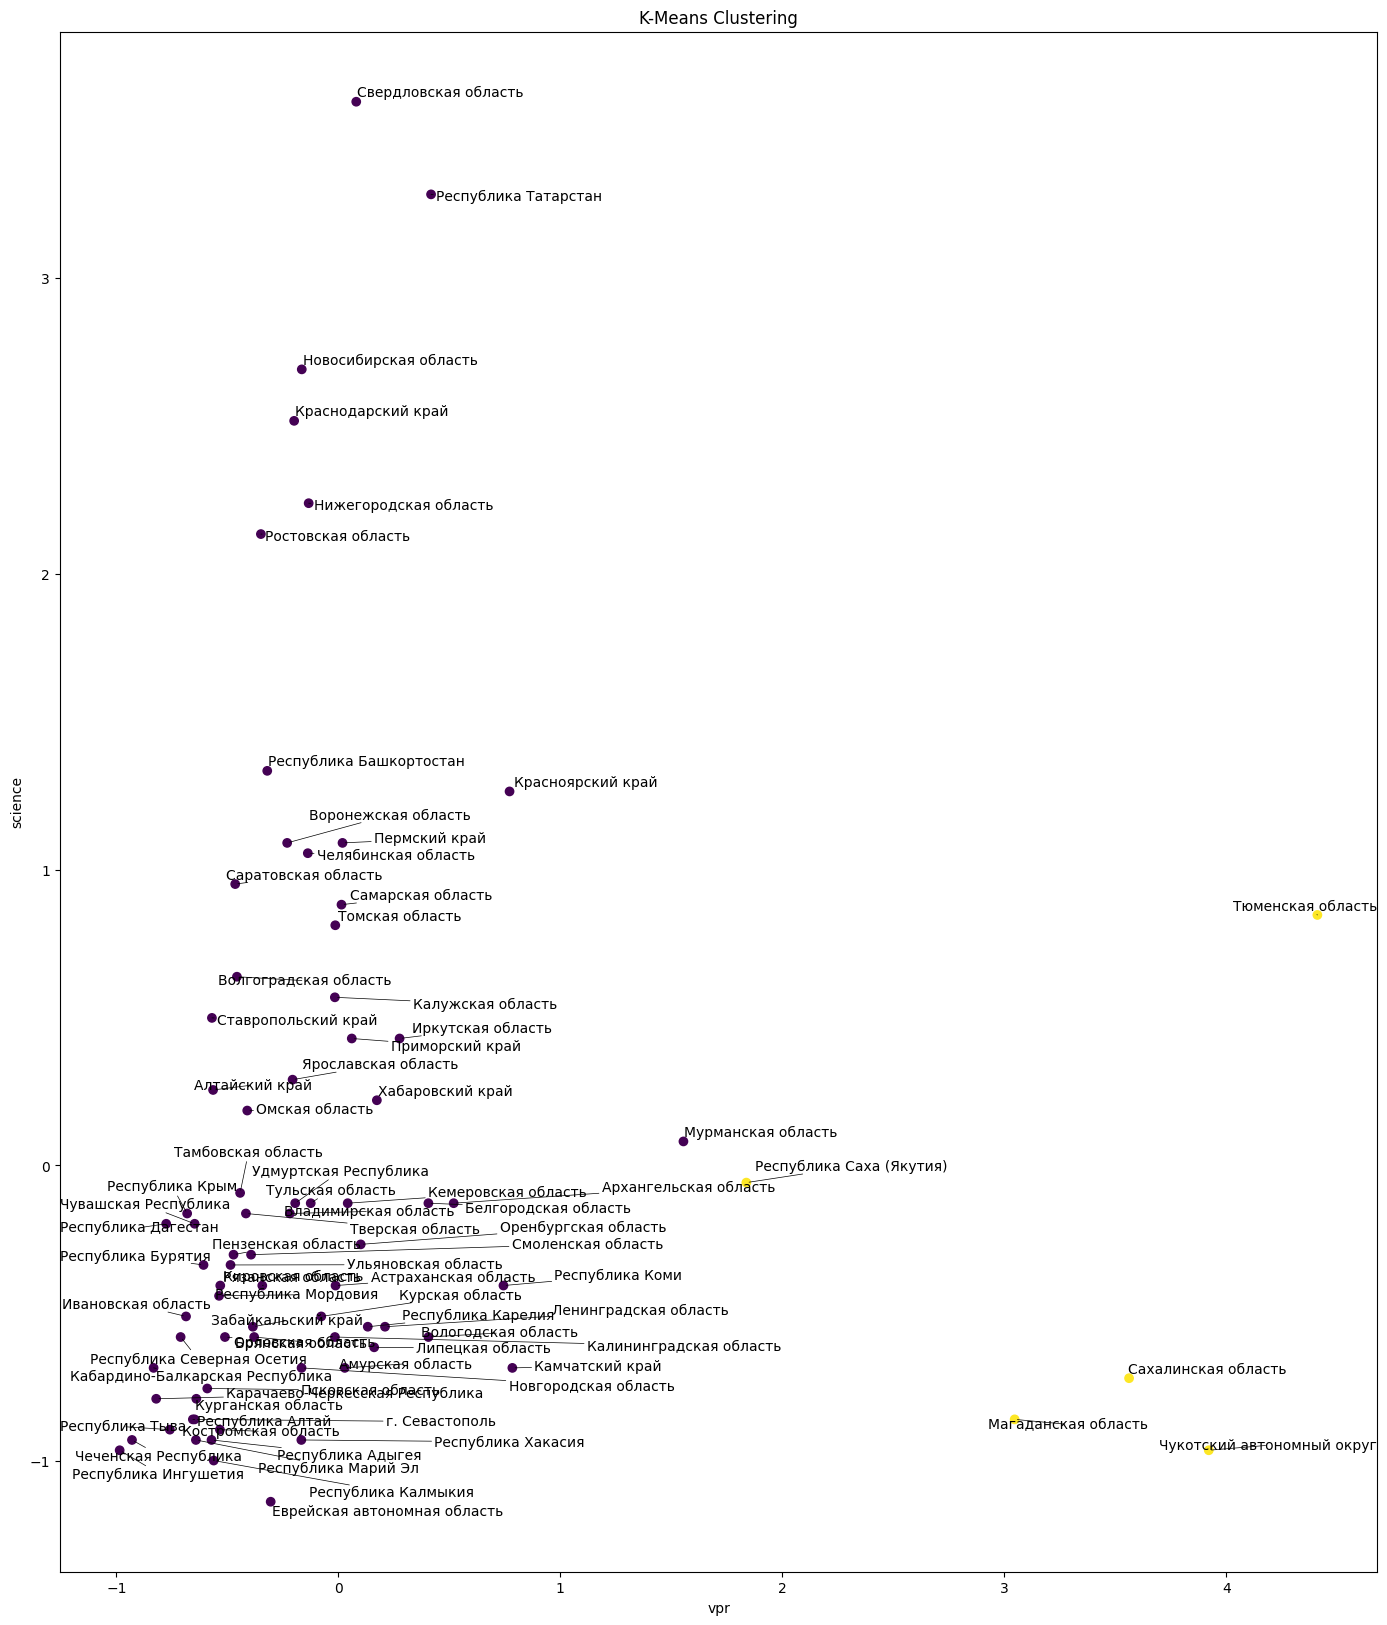

In [62]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['vrp'], scaled_data['science'], c=labels, cmap='viridis')
texts = []

for i, txt in enumerate(scaled_data.index):
    texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xlabel('vpr')
plt.ylabel('science')
plt.title('K-Means Clustering')
plt.show()

In [63]:
print(f"Silhouette Coefficient: {sil}")
print(f"Davies-Bouldin Index: {db}")

Silhouette Coefficient: 0.6569990729520974
Davies-Bouldin Index: 0.5266138257695971


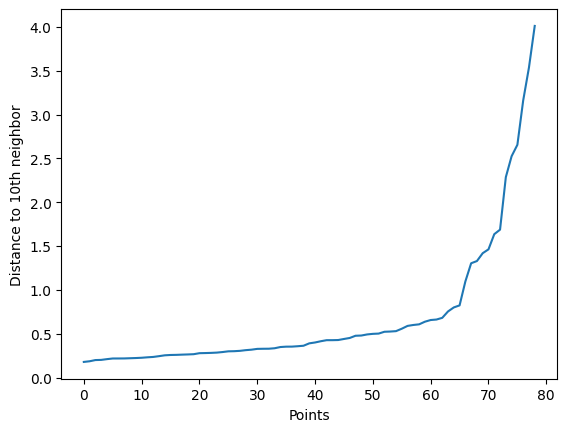

In [64]:
from sklearn.neighbors import NearestNeighbors

X = scaled_data 
knn = NearestNeighbors(n_neighbors=10) 
knn.fit(X)
distances, indices = knn.kneighbors(X)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance to 10th neighbor')
plt.show()

In [82]:
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(scaled_data)
labels = dbscan.labels_
data['cluster'] = labels

/var/folders/63/rt5b9p_52bg2qd8w4hd3t1_00000gn/T/ipykernel_19540/2422206330.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))


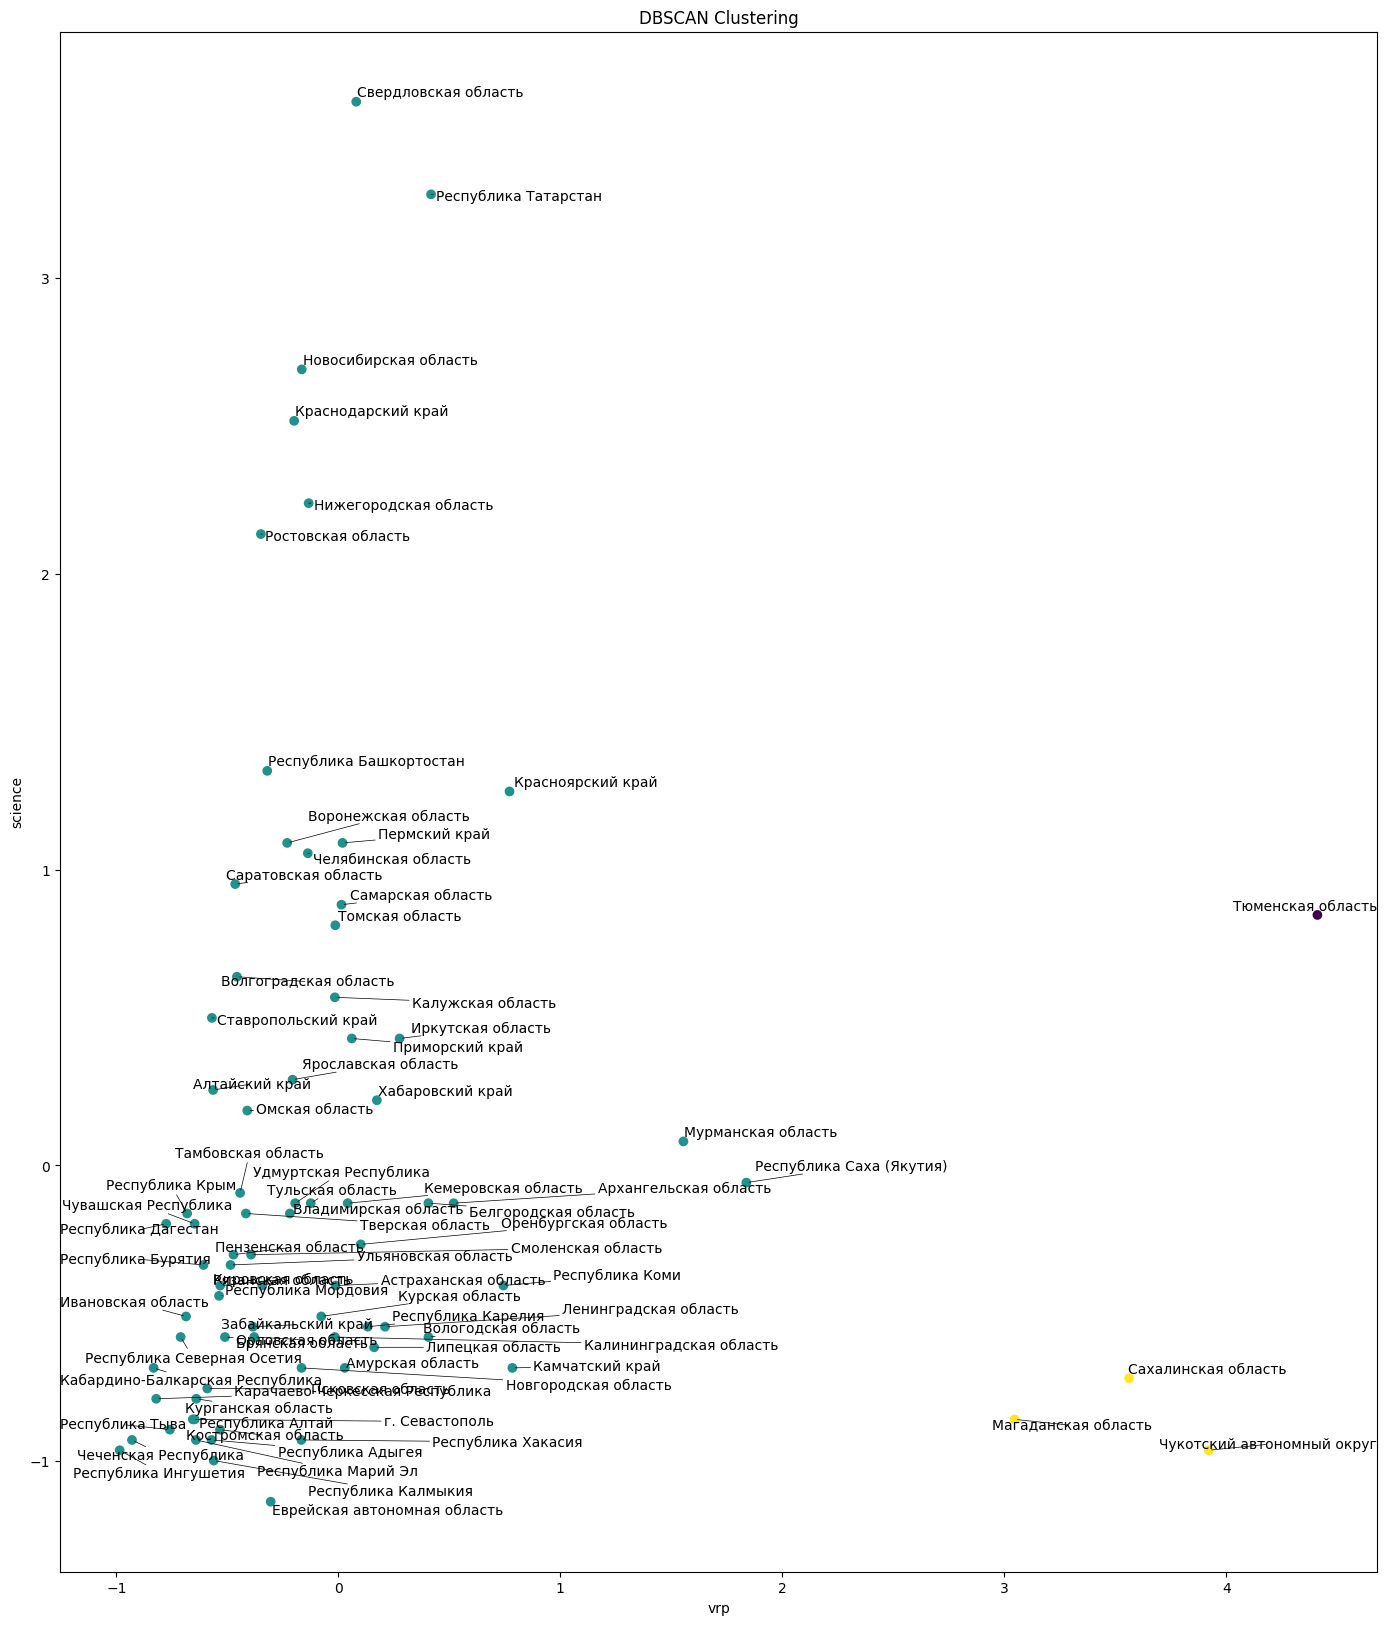


Шумовые точки:
                      vrp  science  cluster
region                                     
Тюменская область  249397       59       -1


In [83]:
plt.figure(figsize=(17, 20))
plt.scatter(scaled_data['vrp'], scaled_data['science'], c=labels, cmap='viridis')
texts = []

for i, txt in enumerate(scaled_data.index):
    texts.append(plt.annotate(txt, (scaled_data['vrp'][i], scaled_data['science'][i])))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
plt.xlabel('vrp')
plt.ylabel('science')
plt.title('DBSCAN Clustering')
plt.show()

noise = data[data['cluster'] == -1]
print("\nШумовые точки:")
print(noise)

In [84]:
try:
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"Silhouette Coefficient: {silhouette_avg}")
except ValueError:
    print("Silhouette Coefficient is undefined for DBSCAN with this configuration.")

db_index = davies_bouldin_score(scaled_data, labels)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Coefficient: 0.6562073283468283
Davies-Bouldin Index: 0.2852682414800312


In [85]:
data.corr()

,vrp,science,cluster
vrp,1.00000,0.049130,0.346380
science,0.04913,1.000000,-0.191752
cluster,0.34638,-0.191752,1.000000
